<a href="https://colab.research.google.com/github/purva98/DeepPixel/blob/master/music_genre_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget http://opihi.cs.uvic.ca/sound/genres.tar.gz

--2020-03-27 07:37:52--  http://opihi.cs.uvic.ca/sound/genres.tar.gz
Resolving opihi.cs.uvic.ca (opihi.cs.uvic.ca)... 142.104.68.135
Connecting to opihi.cs.uvic.ca (opihi.cs.uvic.ca)|142.104.68.135|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1225571541 (1.1G) [application/x-gzip]
Saving to: ‘genres.tar.gz’

genres.tar.gz       100%[===================>]   1.14G  11.8MB/s    in 97s     

2020-03-27 07:39:28 (12.1 MB/s) - ‘genres.tar.gz’ saved [1225571541/1225571541]



In [0]:
# !tar xvzf genres.tar.gz

In [36]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import pathlib

cmap = plt.get_cmap('inferno')
plt.figure(figsize=(10,10))
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for gen in genres:
    pathlib.Path(f'img_data/{gen}').mkdir(parents=True, exist_ok=True)     
    for filename in os.listdir(f'/content/genres/{gen}'):
        songname = f'/content/genres/{gen}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'img_data/{gen}/{filename[:-3].replace(".", "")}.png')
        plt.clf()
    print(f'{gen} has been loaded in the img_dataset folder!')

blues has been loaded in the img_dataset folder!
classical has been loaded in the img_dataset folder!
country has been loaded in the img_dataset folder!
disco has been loaded in the img_dataset folder!


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:7581: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:7581: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:7581: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


hiphop has been loaded in the img_dataset folder!
jazz has been loaded in the img_dataset folder!
metal has been loaded in the img_dataset folder!
pop has been loaded in the img_dataset folder!
reggae has been loaded in the img_dataset folder!
rock has been loaded in the img_dataset folder!


<Figure size 720x720 with 0 Axes>

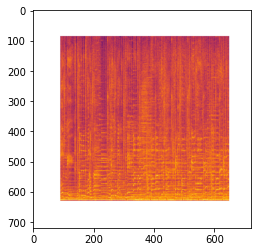

In [30]:
song_spectogram_display = "/content/img_data/country/country00000.png"
import matplotlib.image as mpimg
img = mpimg.imread(song_spectogram_display)
plt.imshow(img)

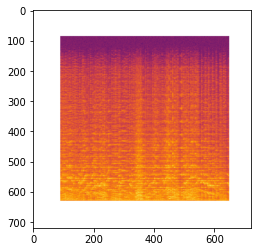

In [31]:
song_spectogram_display = "/content/img_data/classical/classical00000.png"
import matplotlib.image as mpimg
img = mpimg.imread(song_spectogram_display)
plt.imshow(img)

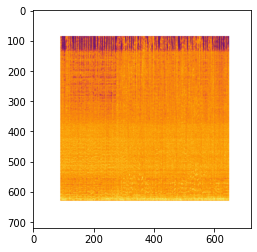

In [33]:
song_spectogram_display = "/content/img_data/metal/metal00000.png"
import matplotlib.image as mpimg
img = mpimg.imread(song_spectogram_display)
plt.imshow(img)

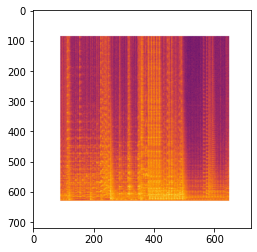

In [34]:
song_spectogram_display = "/content/img_data/jazz/jazz00000.png"
import matplotlib.image as mpimg
img = mpimg.imread(song_spectogram_display)
plt.imshow(img)

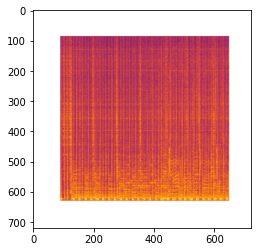

In [35]:
song_spectogram_display = "/content/img_data/disco/disco00000.png"
import matplotlib.image as mpimg
img = mpimg.imread(song_spectogram_display)
plt.imshow(img)

In [3]:
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pylab import rcParams
from skimage import io

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import keras
from keras.utils import np_utils
from keras import backend as K

from keras.optimizers import SGD,RMSprop,adam
from keras.layers import Conv2D, MaxPooling2D, Input, Dense, Flatten, PReLU
from keras.models import Model

Using TensorFlow backend.


In [4]:
%matplotlib inline 
#Define Datapath
data_path ='/content/img_data'
data_dir_list = os.listdir(data_path)

img_data_list=[]
i=0
for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    i=0
    print ('Loaded the files of music genre-'+'{}\n'.format(dataset))
    for img in img_list: 
        i=i+1
        if i<60:
          image= io.imread(data_path + '/'+ dataset + '/'+ img)                
          img_data_list.append(image)
    print(i)
                       
        
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data.shape

Loaded the files of music genre-metal

100
Loaded the files of music genre-pop

100
Loaded the files of music genre-blues

100
Loaded the files of music genre-country

100
Loaded the files of music genre-hiphop

100
Loaded the files of music genre-disco

100
Loaded the files of music genre-reggae

100
Loaded the files of music genre-jazz

100
Loaded the files of music genre-rock

100
Loaded the files of music genre-classical

100


(590, 720, 720, 4)

In [0]:
num_classes = 10 
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')
labels[0:99]=0 
labels[100:199]=1 
labels[200:299]=2 
labels[300:399]=3 
labels[400:499]=4 
labels[500:599]=5 
labels[600:699]=6 
labels[700:799]=7 
labels[800:899]=8 
labels[900:]=9 
names = ['blues', 'classical', 'country' ,'disco' ,'hiphop' ,'jazz' ,'metal' ,'pop' ,'reggae' ,'rock']
def getLabel(id):
    return ['blues', 'classical', 'country' ,'disco' ,'hiphop' ,'jazz' ,'metal' ,'pop' ,'reggae' ,'rock'][id]

In [6]:
# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)
x,y = shuffle(img_data,Y, random_state=1)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=1)
print(img_data[0].shape)

(720, 720, 4)


In [0]:
from keras.layers import Conv2D, MaxPooling2D, Input, Dense, Flatten, PReLU
from keras.models import Model
from keras.layers.core import Dense, Dropout, Activation, Flatten

# First, define the vision modules
digit_input = Input(shape=(720,720,4))
x = Conv2D(32, (3, 3))(digit_input)
x= PReLU(shared_axes=[1,2],name='prelu1')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3))(x)
x= PReLU(shared_axes=[1,2],name='prelu2')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3))(x)
x= PReLU(shared_axes=[1,2],name='prelu3')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (2, 2))(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (2, 2))(x)
x= PReLU(shared_axes=[1,2],name='prelu4')(x)
x = MaxPooling2D((2, 2))(x)
out = Flatten()(x)
out=  Dropout(0.5)(out)
#out = Flatten()(out)
vision_model = Model(digit_input, out)

digit_a = Input(shape=(720,720,4))
out_a = vision_model(digit_a)
out = Dense(10, activation='sigmoid')(out_a)
classification_model = Model(digit_a, out)

In [0]:
classification_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 

In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [0]:
epochs = 35
batch_size = 32

callbacks = [
    EarlyStopping(patience=4, verbose=1),
    ReduceLROnPlateau(patience=4, verbose=1)
]

In [17]:
history = classification_model.fit(X_train,y_train, 
                    batch_size=batch_size, epochs=epochs, callbacks=callbacks,
                    validation_data=(X_test,y_test),
                    verbose=1)




Train on 413 samples, validate on 177 samples
Epoch 1/35





413/413 [==============================] - 26s 63ms/step - loss: 2.0864 - acc: 0.8654 - val_loss: 1.6118 - val_acc: 0.9000
Epoch 2/35
413/413 [==============================] - 9s 21ms/step - loss: 1.6118 - acc: 0.9000 - val_loss: 1.6118 - val_acc: 0.9000
Epoch 3/35
413/413 [==============================] - 9s 21ms/step - loss: 1.6118 - acc: 0.9000 - val_loss: 1.6118 - val_acc: 0.9000
Epoch 4/35
413/413 [==============================] - 9s 21ms/step - loss: 1.6118 - acc: 0.9000 - val_loss: 1.6118 - val_acc: 0.9000
Epoch 5/35
413/413 [==============================] - 9s 21ms/step - loss: 1.6118 - acc: 0.9000 - val_loss: 1.6118 - val_acc: 0.9000

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 00005: early stopping


In [18]:
score = classification_model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 1.611809492111206
Test accuracy: 0.8999999761581421


In [21]:
classification_model.save("genre_model.h5")
classification_model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 720, 720, 4)       0         
_________________________________________________________________
model_3 (Model)              (None, 56448)             155456    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                564490    
Total params: 719,946
Trainable params: 719,946
Non-trainable params: 0
_________________________________________________________________
